## <center> **Tugas Pertemuan 4**

**Data Mahasiswa:**
- Nama : Naresh Pratista
- NIM : 2141720057

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

In [52]:
# import library #

# untuk manipulasi data
import pandas as pd

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# untuk pre-processing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

# untuk model SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# untuk model naive bayes
from sklearn.naive_bayes import MultinomialNB

In [2]:
# import dataset

df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

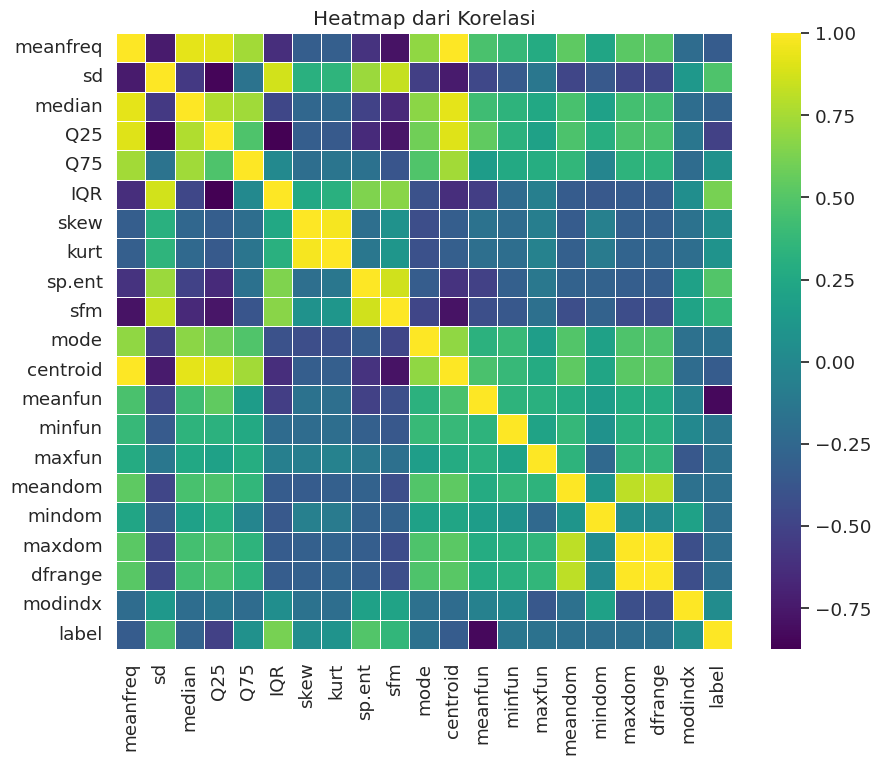

In [4]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, cmap='viridis', linewidths=0.5, fmt=".2f", cbar=True, square=True)

plt.title('Heatmap dari Korelasi')
plt.show()

In [5]:
df.drop(['dfrange', 'centroid'], axis=1, inplace=True)

In [6]:
X = df[df.columns.difference(['label'])]
y = df['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.21477826, -2.57610164, -5.69360723, ...,  0.4715753 ,
         2.29330585, -0.03908279],
       [-0.25848536, -2.48688452, -5.58898726, ...,  0.59443122,
         4.54805598, -0.06523603],
       [ 0.90932569, -2.7069865 , -3.92869875, ...,  0.39826097,
         6.51365636, -1.08373029],
       ...,
       [ 2.49266553, -2.1990394 , -0.01712269, ...,  1.38585653,
        -0.29804429,  1.15019826],
       [ 2.15365344, -1.99185206, -0.20402146, ...,  1.50571108,
        -0.36536651,  1.22984967],
       [ 2.25467137, -1.44608897,  1.10267866, ...,  1.08912637,
        -0.33848726,  0.97175912]])

Text(0, 0.5, 'No. of persons')

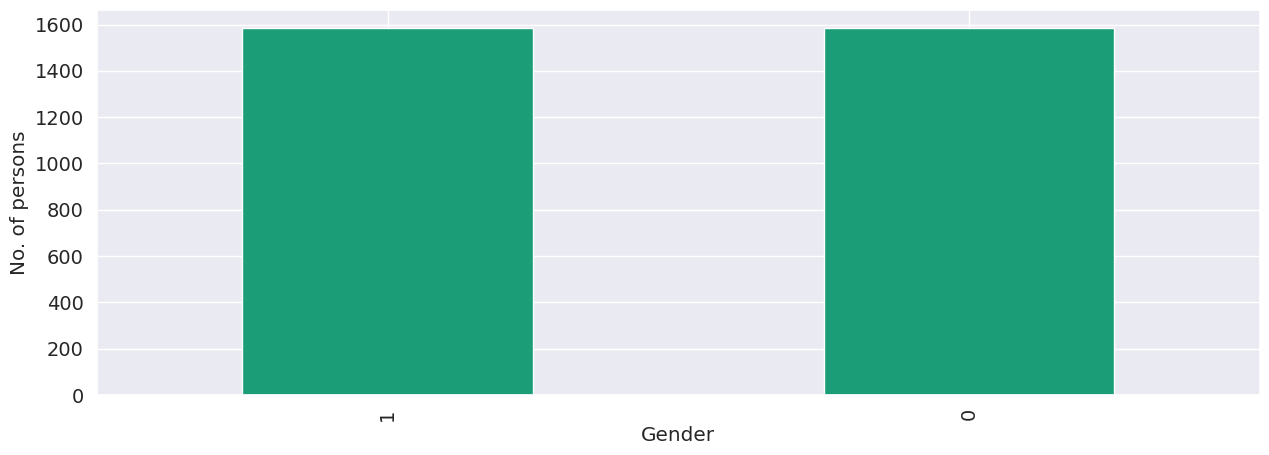

In [7]:
df['label'].value_counts().plot(kind='bar',figsize = (15,5),fontsize = 14,colormap='Dark2')
plt.xlabel('Gender')
plt.ylabel('No. of persons')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [73]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accScore = metrics.accuracy_score(y_test,y_pred)
print(f'Skor Akurasi : {int(accScore * 100)}%')

Skor Akurasi : 97%


2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
- Menggunakan data spam.csv
- Fitur CountVectorizer dengan mengaktifkan stop_words
- Evaluasi hasilnya

In [61]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [62]:
df = df.drop(df.iloc[:, 2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
cols={'v1':'Labels', 'v2':'SMS'}

df=df.rename(columns=cols)
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
df.value_counts('Labels')

Labels
ham     4825
spam     747
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [66]:
df.describe()

,Labels,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [67]:
labels = {
    'spam' : 1,
    'ham' : 0
}

df['Labels'] = df['Labels'].map(labels)
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
X = df['SMS'].values
y = df['Labels'].values

In [69]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)
print(vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [71]:
MNB = MultinomialNB()

MNB.fit(X_train, y_train)

y_pred_train = MNB.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = MNB.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print('Training data accuracy: ', acc_train)
print('Test data accuracy: ', acc_test)

Training data accuracy:  0.9948395781916087
Test data accuracy:  0.9775784753363229


3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
- Menggunakan data spam.csv
- Fitur TF-IDF dengan mengaktifkan stop_words
- Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
- Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [53]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [56]:
X = df['SMS'].values
y = df['Labels'].values

X = tfidf_vectorizer.fit_transform(X)

print(tfidf_vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


In [57]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

y_pred_train = MNB.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = MNB.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

In [59]:
print('Training data accuracy: ', acc_train)
print('Test data accuracy: ', acc_test)

Training data accuracy:  0.9948395781916087
Test data accuracy:  0.9775784753363229
